In [ ]:
sample_space = {'Heads', 'Tails'}

In [ ]:
probability_heads = 1 / len(sample_space)
print(f'Probability of choosing heads is {probability_heads}')

Probability of choosing heads is 0.5


In [ ]:
def is_heads_or_tails(outcome):  return outcome in {'Heads', 'Tails'}
def is_neither(outcome): return not is_heads_or_tails(outcome)

In [ ]:
def is_heads(outcome): return outcome == 'Heads'
def is_tails(outcome): return outcome == 'Tails'


In [ ]:
def get_matching_event(event_condition, sample_space):
    return set([outcome for outcome in sample_space if event_condition(outcome)])

In [ ]:
event_conditions = [is_heads_or_tails, is_heads, is_tails, is_neither]

for event_condition in event_conditions:
    print(f"Event Condition: {event_condition.__name__}")
    event = get_matching_event(event_condition, sample_space)
    print(f'Event: {event}\n')

Event Condition: is_heads_or_tails
Event: {'Heads', 'Tails'}

Event Condition: is_heads
Event: {'Heads'}

Event Condition: is_tails
Event: {'Tails'}

Event Condition: is_neither
Event: set()



In [ ]:
def compute_probability(event_condition, generic_sample_space):
    event = get_matching_event(event_condition, generic_sample_space)
    return len(event) / len(generic_sample_space)


In [ ]:
compute_probability.__name__

'compute_probability'

In [ ]:
for event_condition in event_conditions:
    prob = compute_probability(event_condition, sample_space)
    name = event_condition.__name__
    print(f"Probability of event arising from '{name}' is {prob}") # p. 7 up

Probability of event arising from 'is_heads_or_tails' is 1.0
Probability of event arising from 'is_heads' is 0.5
Probability of event arising from 'is_tails' is 0.5
Probability of event arising from 'is_neither' is 0.0


In [ ]:
weighted_sample_space = {'Heads': 4, 'Tails': 1}

sample_space_size = sum(weighted_sample_space.values())
assert sample_space_size == 5


In [ ]:
event = get_matching_event(is_heads_or_tails, weighted_sample_space)
event_size = sum(weighted_sample_space[outcome] for outcome in event)
assert event_size == 5

In [ ]:
def compute_event_probability(event_condition, generic_sample_space):
    event = get_matching_event(event_condition, generic_sample_space)
    if type(generic_sample_space) == type(set()):
        return len(event) / len(generic_sample_space)
    event_size = sum(generic_sample_space[outcome] for outcome in event)
    return event_size / sum(generic_sample_space.values()) # listing 1.11

In [ ]:
type(sample_space)

set

In [ ]:
for event_condition in event_conditions:
    prob = compute_event_probability(event_condition, weighted_sample_space)
    name = event_condition.__name__
    print(f"Probability of event arising from '{name}' is {prob}")


Probability of event arising from 'is_heads_or_tails' is 1.0
Probability of event arising from 'is_heads' is 0.8
Probability of event arising from 'is_tails' is 0.2
Probability of event arising from 'is_neither' is 0.0


In [ ]:
possible_children = ['Boy', 'Girl']
sample_space = set()
for child1 in possible_children:
    for child2 in possible_children:
        for child3 in possible_children:
            for child4 in possible_children:
                outcome = (child1, child2, child3, child4)
                sample_space.add(outcome) # listing 1.13 on page 9

In [ ]:
sample_space

{('Boy', 'Boy', 'Boy', 'Boy'),
 ('Boy', 'Boy', 'Boy', 'Girl'),
 ('Boy', 'Boy', 'Girl', 'Boy'),
 ('Boy', 'Boy', 'Girl', 'Girl'),
 ('Boy', 'Girl', 'Boy', 'Boy'),
 ('Boy', 'Girl', 'Boy', 'Girl'),
 ('Boy', 'Girl', 'Girl', 'Boy'),
 ('Boy', 'Girl', 'Girl', 'Girl'),
 ('Girl', 'Boy', 'Boy', 'Boy'),
 ('Girl', 'Boy', 'Boy', 'Girl'),
 ('Girl', 'Boy', 'Girl', 'Boy'),
 ('Girl', 'Boy', 'Girl', 'Girl'),
 ('Girl', 'Girl', 'Boy', 'Boy'),
 ('Girl', 'Girl', 'Boy', 'Girl'),
 ('Girl', 'Girl', 'Girl', 'Boy'),
 ('Girl', 'Girl', 'Girl', 'Girl')}

In [ ]:
from itertools import product
all_combinations = product(*(4 * [possible_children]))
assert set(all_combinations) == sample_space # listing 1.14

In [ ]:
set(all_combinations)

set()

In [ ]:
sample_space_efficient = set(product(possible_children, repeat=4))
assert sample_space == sample_space_efficient # listing 1.15


In [ ]:
sample_space_efficient

{('Boy', 'Boy', 'Boy', 'Boy'),
 ('Boy', 'Boy', 'Boy', 'Girl'),
 ('Boy', 'Boy', 'Girl', 'Boy'),
 ('Boy', 'Boy', 'Girl', 'Girl'),
 ('Boy', 'Girl', 'Boy', 'Boy'),
 ('Boy', 'Girl', 'Boy', 'Girl'),
 ('Boy', 'Girl', 'Girl', 'Boy'),
 ('Boy', 'Girl', 'Girl', 'Girl'),
 ('Girl', 'Boy', 'Boy', 'Boy'),
 ('Girl', 'Boy', 'Boy', 'Girl'),
 ('Girl', 'Boy', 'Girl', 'Boy'),
 ('Girl', 'Boy', 'Girl', 'Girl'),
 ('Girl', 'Girl', 'Boy', 'Boy'),
 ('Girl', 'Girl', 'Boy', 'Girl'),
 ('Girl', 'Girl', 'Girl', 'Boy'),
 ('Girl', 'Girl', 'Girl', 'Girl')}

In [ ]:
def has_two_boys(outcome):
    return len([child for child in outcome if child == 'Boy']) == 2

In [ ]:
prob = compute_event_probability(has_two_boys, sample_space)
print(f"Probability of 2 boys is {prob}") # listing 1.16

Probability of 2 boys is 0.375


In [ ]:
possible_rolls = list(range(1, 7))
print(possible_rolls)

[1, 2, 3, 4, 5, 6]


In [ ]:
sample_space = set(product(possible_rolls, repeat=6))


In [ ]:
len(sample_space)

46656

In [ ]:
def has_sum_of_21(outcome):
    return sum(outcome) == 21

In [ ]:
prob = compute_event_probability(has_sum_of_21, sample_space)
print(f"6 rolls sum to 21 with a probability of {prob}") # listing 1.19

6 rolls sum to 21 with a probability of 0.09284979423868313


In [ ]:
prob = compute_event_probability(lambda x: sum(x) == 21, sample_space)
assert prob == compute_event_probability(has_sum_of_21, sample_space)

In [ ]:
prob

0.09284979423868313

In [ ]:
from collections import defaultdict
weighted_sample_space = defaultdict(int)
for outcome in sample_space:
    total = sum(outcome)
    weighted_sample_space[total] += 1
# listing 1.21

In [ ]:
weighted_sample_space[8]

21

In [ ]:
weighted_sample_space

defaultdict(int,
            {21: 4332,
             22: 4221,
             27: 1666,
             12: 456,
             24: 3431,
             19: 3906,
             18: 3431,
             20: 4221,
             23: 3906,
             26: 2247,
             28: 1161,
             15: 1666,
             17: 2856,
             13: 756,
             14: 1161,
             30: 456,
             16: 2247,
             25: 2856,
             9: 56,
             32: 126,
             31: 252,
             29: 756,
             11: 252,
             33: 56,
             10: 126,
             7: 6,
             35: 6,
             8: 21,
             34: 21,
             6: 1,
             36: 1})

In [ ]:
event = get_matching_event(lambda x: sum(x) == 21, sample_space)
assert weighted_sample_space[21] == len(event)
assert sum(weighted_sample_space.values()) == len(sample_space) # listing 1.25

In [ ]:
sum(weighted_sample_space.values())

46656

In [ ]:
rob = compute_event_probability(lambda x: x == 21, weighted_sample_space)
assert prob == compute_event_probability(has_sum_of_21, sample_space)
print(f"6 rolls sum to 21 with a probability of {prob}")
# listing 1.26

6 rolls sum to 21 with a probability of 0.09284979423868313


In [ ]:
print('Number of Elements in Unweighted Sample Space:')
print(len(sample_space))
print('Number of Elements in Weighted Sample Space:')
print(len(weighted_sample_space)) # listing 1.27

Number of Elements in Unweighted Sample Space:
46656
Number of Elements in Weighted Sample Space:
31


## Section 1.3

Here's a formula $f(a) = \sqrt{\frac{1}{2} - a^2}$

In [ ]:
def is_in_interval(number, minimum, maximum):
    return minimum <= number <= maximum
# listing 1.28

In [ ]:
from math import sqrt
is_in_interval(sqrt(2), 1.413, 1.415)

True

In [ ]:
prob = compute_event_probability(lambda x: is_in_interval(x, 10, 21), weighted_sample_space)
print(f"Probability of interval is {prob}") # listing 1.29

Probability of interval is 0.5446244855967078


In [ ]:
def generate_coin_sample_space(num_flips=10):
    weighted_sample_space = defaultdict(int)
    for coin_flips in product(['Heads', 'Tails'], repeat=num_flips):
        heads_count = len([outcome for outcome in coin_flips if outcome == 'Heads'])
        weighted_sample_space[heads_count] += 1
    return weighted_sample_space
weighted_sample_space = generate_coin_sample_space()
assert weighted_sample_space[10] == 1
assert weighted_sample_space[9] == 10 # listing 1.30

In [ ]:
weighted_sample_space

defaultdict(int,
            {10: 1,
             9: 10,
             8: 45,
             7: 120,
             6: 210,
             5: 252,
             4: 210,
             3: 120,
             2: 45,
             1: 10,
             0: 1})

In [ ]:
prob = compute_event_probability(lambda x: is_in_interval(x, 8, 10), weighted_sample_space)
print(f"Probability of observing more than 7 heads is {prob}")
# listing 1.31

Probability of observing more than 7 heads is 0.0546875


In [ ]:
prob = compute_event_probability(lambda x: not is_in_interval(x, 3, 7), weighted_sample_space)
print(f"Probability of observing more than 7 heads or 7 tails is {prob}")
# listing 1.32

Probability of observing more than 7 heads or 7 tails is 0.109375


In [ ]:
weighted_sample_space_20_flips = generate_coin_sample_space(num_flips=20)
prob = compute_event_probability(lambda x: not is_in_interval(x, 5, 15),
weighted_sample_space_20_flips)
print(f"Probability of observing more than 15 heads or 15 tails is {prob}") # listing 1.33

Probability of observing more than 15 heads or 15 tails is 0.01181793212890625


# now on page 18

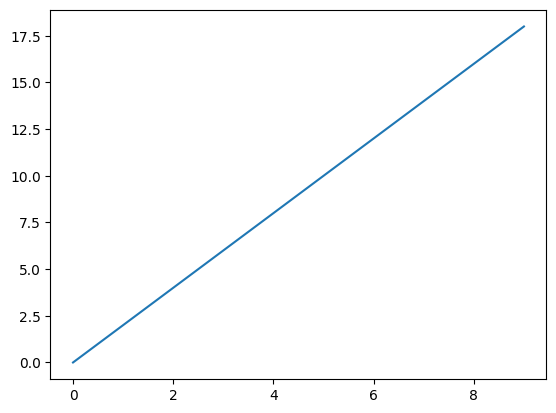

In [ ]:
import matplotlib.pyplot as plt

x = range(0, 10)
y = [2 * value for value in x]
plt.plot(x, y)
plt.show() # listing 2.2


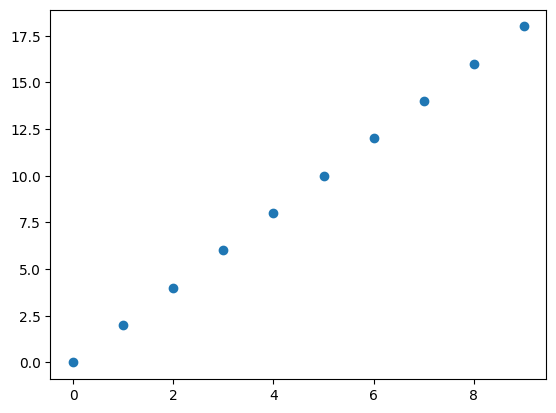

In [ ]:
plt.scatter(x, y)
plt.show()
# listing 2.3

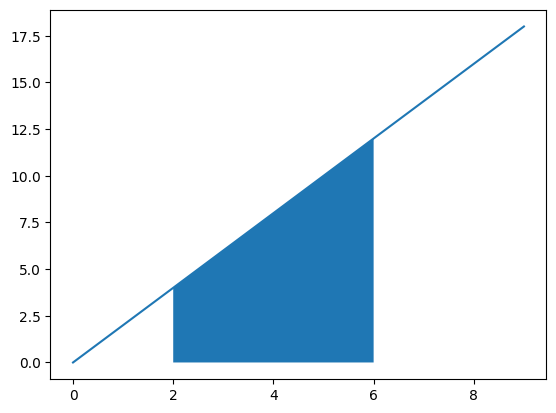

In [ ]:
plt.plot(x, y)
where = [is_in_interval(value, 2, 6) for value in x]
plt.fill_between(x, y, where=where)
plt.show()
# listing 2.4

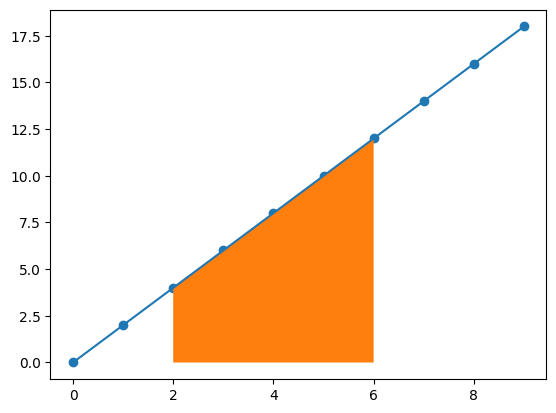

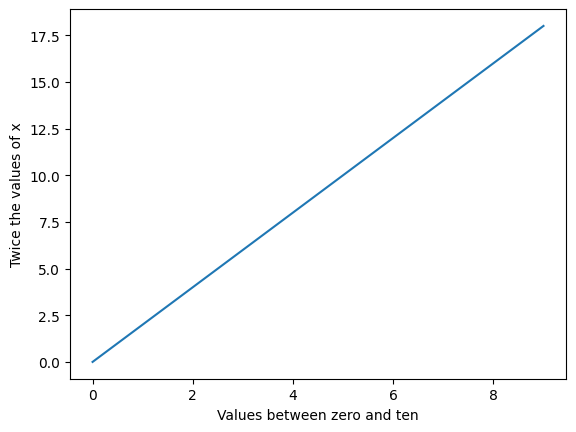

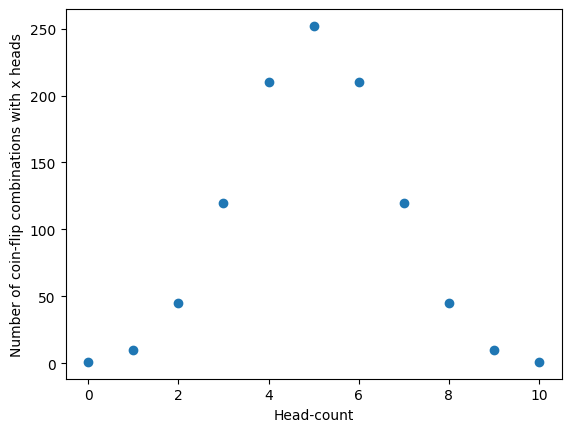

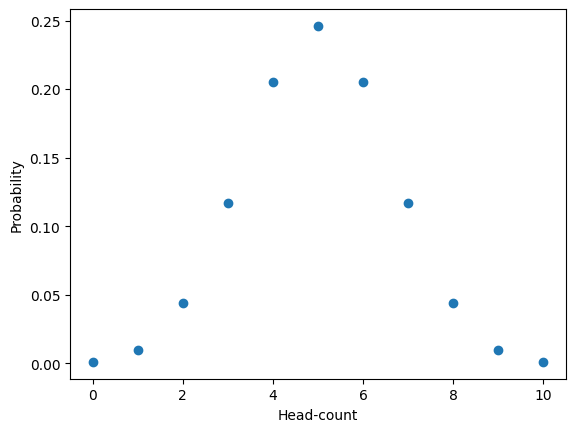

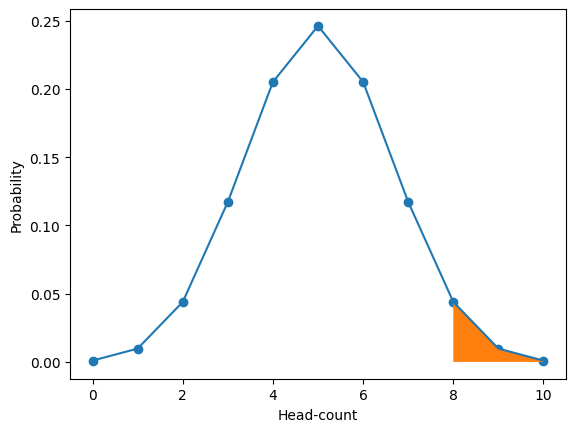

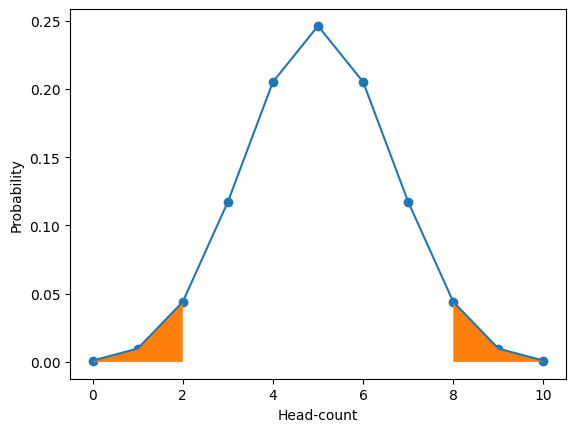

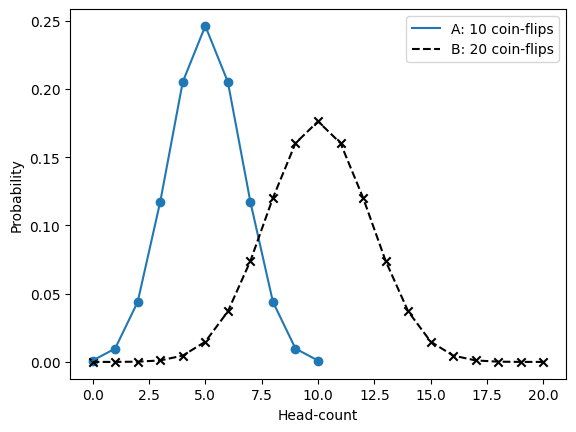

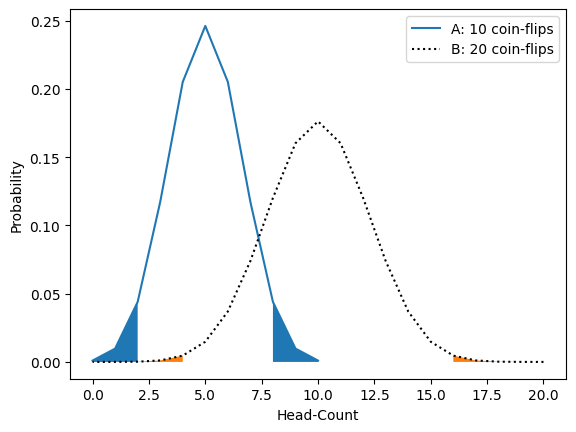

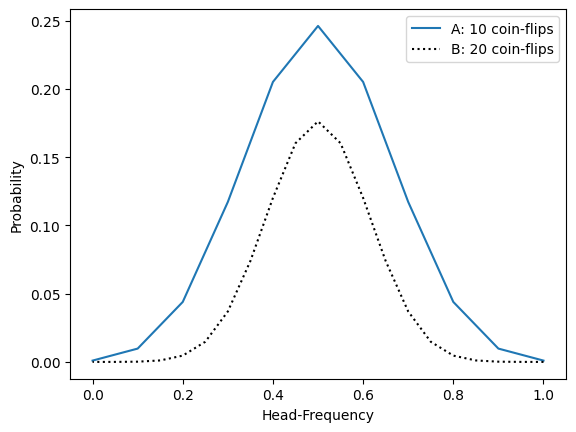

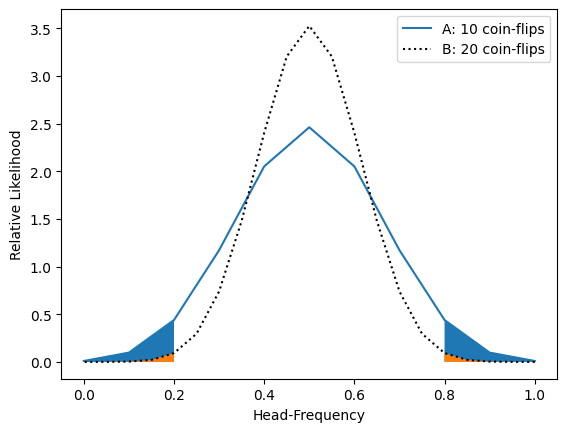

Coin landed on tails
Frequency of Heads is 0.8


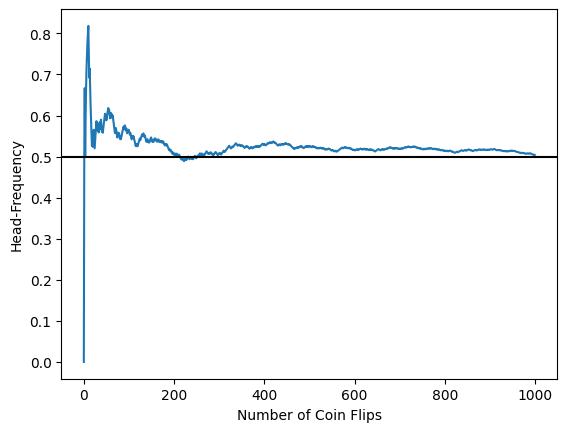

In [ ]:
plt.scatter(x, y)
plt.plot(x, y)
plt.fill_between(x, y, where=where)
plt.show() # listing 2.5

plt.plot(x, y)
plt.xlabel('Values between zero and ten')
plt.ylabel('Twice the values of x')
plt.show() # listing 2.6

x_10_flips = list(weighted_sample_space.keys())
y_10_flips = [weighted_sample_space[key] for key in x_10_flips]
plt.scatter(x_10_flips, y_10_flips)
plt.xlabel('Head-count')
plt.ylabel('Number of coin-flip combinations with x heads')
plt.show() # listing 2.7 on page 22

sample_space_size = sum(weighted_sample_space.values())
prob_x_10_flips = [value / sample_space_size for value in y_10_flips]
plt.scatter(x_10_flips, prob_x_10_flips)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show() # listing 2.8

assert sum(prob_x_10_flips) == 1.0 # listing 2.9

plt.plot(x_10_flips, prob_x_10_flips)
plt.scatter(x_10_flips, prob_x_10_flips)
where = [is_in_interval(value, 8, 10) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show() # listing 2.10

plt.plot(x_10_flips, prob_x_10_flips)
plt.scatter(x_10_flips, prob_x_10_flips)
where = [not is_in_interval(value, 3, 7) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()
# listing 2.11

x_20_flips = list(weighted_sample_space_20_flips.keys())
y_20_flips = [weighted_sample_space_20_flips[key] for key in x_20_flips]
sample_space_size = sum(weighted_sample_space_20_flips.values())
prob_x_20_flips = [value / sample_space_size for value in y_20_flips] # listing 2.12

plt.plot(x_10_flips, prob_x_10_flips, label='A: 10 coin-flips')
plt.scatter(x_10_flips, prob_x_10_flips)
plt.plot(x_20_flips, prob_x_20_flips, color='black', linestyle='--', label='B: 20 coin-flips')
plt.scatter(x_20_flips, prob_x_20_flips, color='k', marker='x')
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.legend()
plt.show() # listing 2.13 on page 27

plt.plot(x_10_flips, prob_x_10_flips, label='A: 10 coin-flips')
plt.plot(x_20_flips, prob_x_20_flips, color='k', linestyle=':', label='B: 20 coin-flips')
where_10 = [not is_in_interval(value, 3, 7) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where_10)
where_20 = [not is_in_interval(value, 5, 15) for value in x_20_flips]
plt.fill_between(x_20_flips, prob_x_20_flips, where=where_20)

plt.xlabel('Head-Count')
plt.ylabel('Probability')
plt.legend()
plt.show()
# listing 2.14

x_10_frequencies = [head_count /10 for head_count in x_10_flips]
x_20_frequencies = [head_count /20 for head_count in x_20_flips]
plt.plot(x_10_frequencies, prob_x_10_flips, label='A: 10 coin-flips')
plt.plot(x_20_frequencies, prob_x_20_flips, color='k', linestyle=':', label='B: 20 coin-flips')
plt.legend()
plt.xlabel('Head-Frequency')
plt.ylabel('Probability')
plt.show() # listing 2.15

relative_likelihood_10 = [10 * prob for prob in prob_x_10_flips]
relative_likelihood_20 = [20 * prob for prob in prob_x_20_flips]
# listing 2.16

plt.plot(x_10_frequencies, relative_likelihood_10, label='A: 10 coin-flips')
plt.plot(x_20_frequencies, relative_likelihood_20, color='k',
linestyle=':', label='B: 20 coin-flips')
plt.fill_between(x_10_frequencies, relative_likelihood_10, where=where_10)
plt.fill_between(x_20_frequencies, relative_likelihood_20, where=where_20)
plt.legend()
plt.xlabel('Head-Frequency')
plt.ylabel('Relative Likelihood')
plt.show()
# listing 2.17 page 30

# 3: running random simulations in NumPy

import numpy as np
 # listing 3.1 on page 34

die_roll = np.random.randint(1, 7)
assert 1 <= die_roll <= 6 # listing 3.2

np.random.seed(0)
die_rolls = [np.random.randint(1, 7) for _ in range(3)]
assert die_rolls == [5, 6, 1] # listing 3.3 on page 34

np.random.seed(0)
coin_flip = np.random.randint(0, 2)
print(f"Coin landed on {'heads' if coin_flip == 1 else 'tails'}")
 # listing 3.4

np.random.seed(0)
def frequency_heads(coin_flip_sequence):
    total_heads = len([head for head in coin_flip_sequence if head == 1])
    return total_heads / len(coin_flip_sequence)

coin_flips = [np.random.randint(0, 2) for _ in range(10)]
freq_heads = frequency_heads(coin_flips)
print(f"Frequency of Heads is {freq_heads}") # listing 3.5

np.random.seed(0)
coin_flips = []
frequencies = []
for _ in range(1000):
    coin_flips.append(np.random.randint(0, 2))
    frequencies.append(frequency_heads(coin_flips))

plt.plot(list(range(1000)), frequencies)
plt.axhline(0.5, color='k')
plt.xlabel('Number of Coin Flips')
plt.ylabel('Head-Frequency')
plt.show() # listing 3.6